In [13]:
from tslearn.clustering import TimeSeriesKMeans
import pickle
import numpy as np
from skfda import FDataGrid
from skfda.preprocessing.dim_reduction import FPCA
import matplotlib.pyplot as plt
from itertools import combinations

# Caricamento delle serie temporali

In [14]:
with open('./pickles/allPixelNDVIPoly.pickle', 'rb') as handle:
    allPixelNDVIPoly_3 = pickle.load(handle)

with open('./pickles/allPixelNDVIPoly4.pickle', 'rb') as handle:
    allPixelNDVIPoly_4 = pickle.load(handle)

with open('./pickles/allPixelNDVIPoly6.pickle', 'rb') as handle:
    allPixelNDVIPoly_6 = pickle.load(handle)

num_components = 3

# Caricamento della resa 

In [15]:
with open('./pickles/newResa3.pickle', 'rb') as handle:
    newResa3 = pickle.load(handle)

with open('./pickles/newResa4.pickle', 'rb') as handle:
    newResa4 = pickle.load(handle)

with open('./pickles/newResa6.pickle', 'rb') as handle:
    newResa6 = pickle.load(handle)

# Pulizia dei dati

In [16]:
allPixelNDVIPoly_3 = allPixelNDVIPoly_3[(newResa3<=11000) & (newResa3 >= 4000),:]
newResa3 = newResa3[(newResa3<=11000) & (newResa3 >= 4000)]

allPixelNDVIPoly_4 = allPixelNDVIPoly_4[(newResa4<=11000) & (newResa4 >= 4000),:]
newResa4 = newResa4[(newResa4<=11000) & (newResa4 >= 4000)]

allPixelNDVIPoly_6 = allPixelNDVIPoly_6[(newResa6<=11000) & (newResa6 >= 4000),:]
newResa6 = newResa6[(newResa6<=11000) & (newResa6 >= 4000)]

# Creazione formato dato per sklearn

In [17]:
DataGrid_3 = FDataGrid(data_matrix=allPixelNDVIPoly_3,grid_points=range(len(allPixelNDVIPoly_3[0])))

DataGrid_4 = FDataGrid(data_matrix=allPixelNDVIPoly_4,grid_points=range(len(allPixelNDVIPoly_4[0])))

DataGrid_6 = FDataGrid(data_matrix=allPixelNDVIPoly_6,grid_points=range(len(allPixelNDVIPoly_6[0])))

In [18]:
fpca = FPCA(n_components=num_components)
FPCAscores_3 = np.array(fpca.fit_transform(DataGrid_3))

FPCAscores_4 = np.array(fpca.fit_transform(DataGrid_4))

FPCAscores_6 = np.array(fpca.fit_transform(DataGrid_6))

In [19]:
print(FPCAscores_3)
print(len(newResa3))
print(len(allPixelNDVIPoly_3))
print(len(FPCAscores_3))

[[ 0.30542031  0.86851136  1.11474472]
 [ 0.45078095  0.41362709  0.43506899]
 [ 0.49024627  0.20122018  0.09089281]
 ...
 [ 0.31860066 -0.07899767  0.09030033]
 [ 0.54410896  0.01434716  0.20923058]
 [ 0.58904178  0.20231863  0.52726146]]
1471
1471
1471


In [20]:
score_array_3 = (np.array(FPCAscores_3)-np.array(FPCAscores_3).min())/np.array(FPCAscores_3).max()
score_array_4 = (np.array(FPCAscores_4)-np.array(FPCAscores_4).min())/np.array(FPCAscores_4).max()
score_array_6 = (np.array(FPCAscores_6)-np.array(FPCAscores_6).min())/np.array(FPCAscores_6).max()


# Facciamo le permutazioni per tutte le possibili combinazioni di scores delle fpca

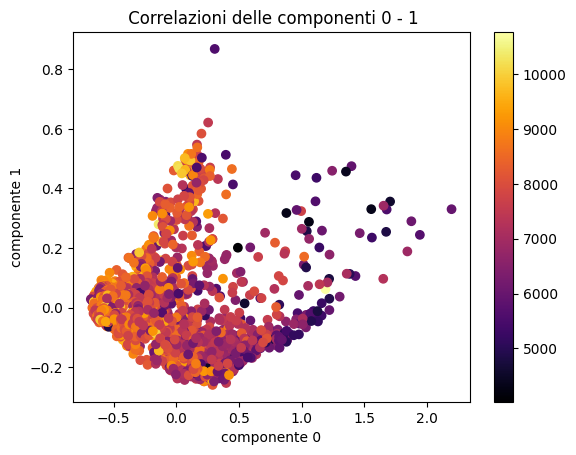

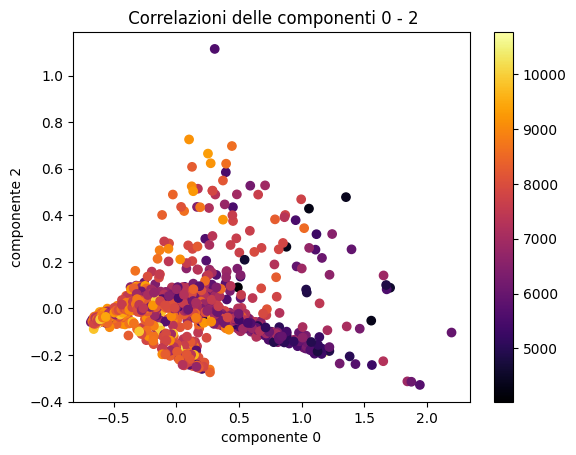

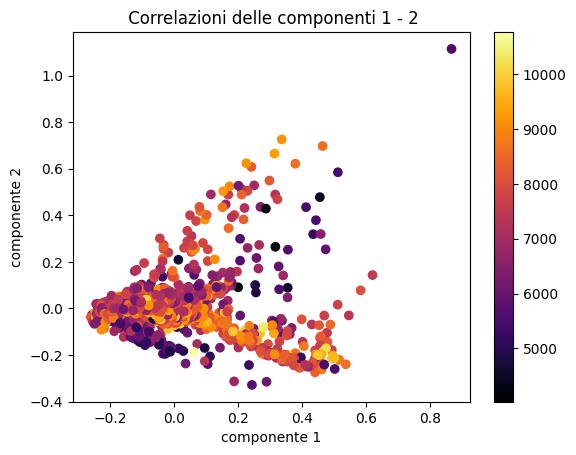

In [21]:
comb = list(combinations(range(num_components), 2))
for a in comb:
    fig, ax = plt.subplots()
    scatter = ax.scatter(FPCAscores_3[:,a[0]], FPCAscores_3[:,a[1]],c=newResa3,cmap='inferno')
    fig.colorbar(scatter)

    plt.xlabel("componente " +str(a[0]))
    plt.ylabel("componente " +str(a[1]))
    plt.title(" Correlazioni delle componenti "+str(a[0])+" - "+str(a[1]))

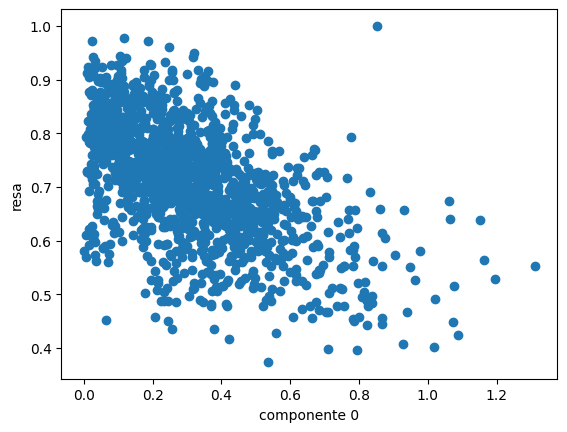

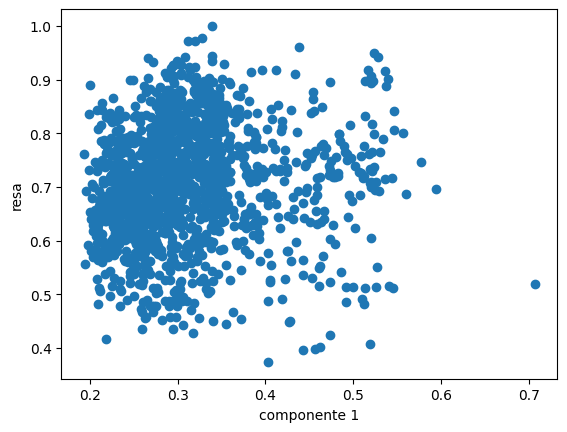

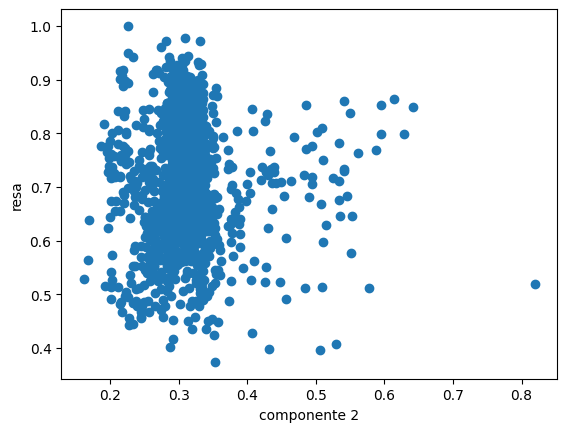

In [22]:
# Proviamo a mettere in relazione la resa con fpca scores 

for a in range(num_components):
    
    fig, ax = plt.subplots()
    scatter = ax.scatter(score_array_3[:,a],(newResa3/newResa3.max()))
    plt.xlabel("componente " +str(a))
    plt.ylabel("resa")


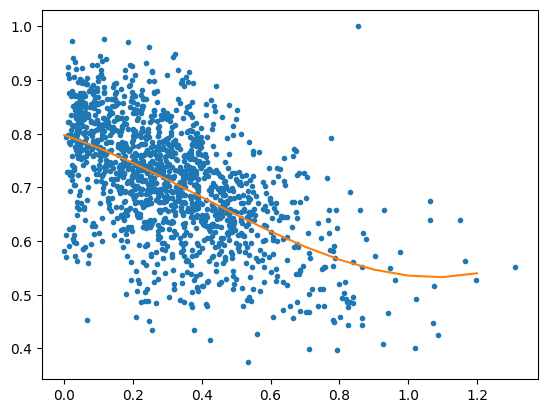

[[ 1.         -0.55373814]
 [-0.55373814  1.        ]]


In [23]:
import numpy as np
from numpy.polynomial.polynomial import polyfit
import matplotlib.pyplot as plt

# Sample data
'''x = np.arange(10)
y = 5 * x + 10'''
#scatter = ax.scatter(score_array[:,0],(newResa3/newResa3.max()))
# Fit with polyfit
#print(polyfit(score_array[:,0], (newResa3/newResa3.max()), 2).shape)
fit_result = polyfit(score_array_3[:,0], (newResa3/newResa3.max()), 3)

linex = np.arange(0,1.3,0.1)
plotRes = 0
for i in range(len(fit_result)):
    plotRes += fit_result[i]*linex**i


plt.plot(score_array_3[:,0], (newResa3/newResa3.max()), '.')
plt.plot(linex, plotRes, '-')
plt.show()

r = np.corrcoef(score_array_3[:,0], (newResa3/newResa3.max()))
print(r)


# osserviamo le relazioni anche per gli altri campi, il 4 e il 6

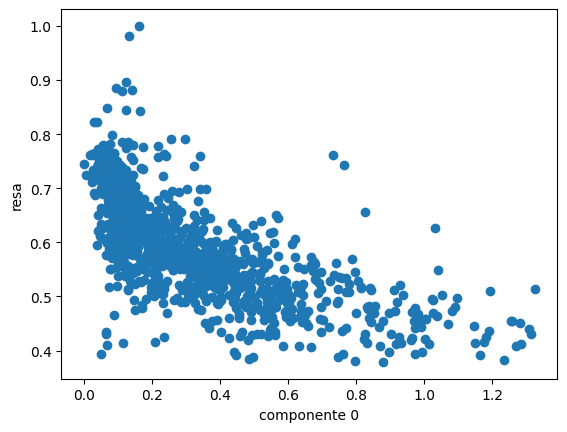

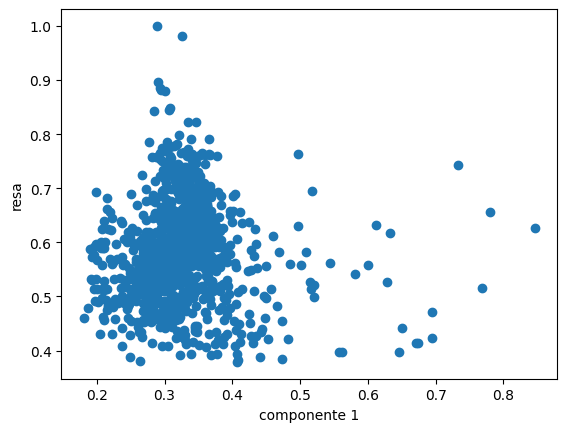

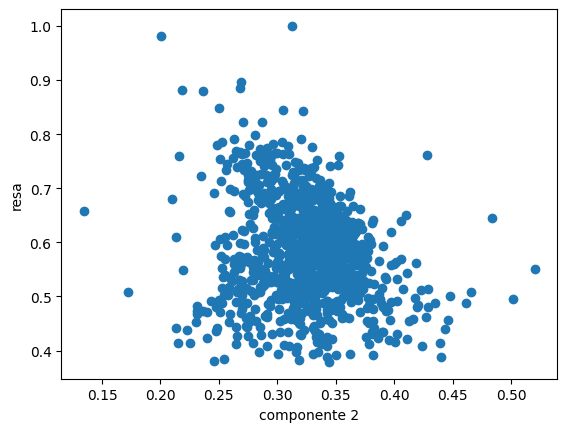

In [24]:

for a in range(num_components):
    
    fig, ax = plt.subplots()
    scatter = ax.scatter(score_array_4[:,a],(newResa4/newResa4.max()))
    plt.xlabel("componente " +str(a))
    plt.ylabel("resa")


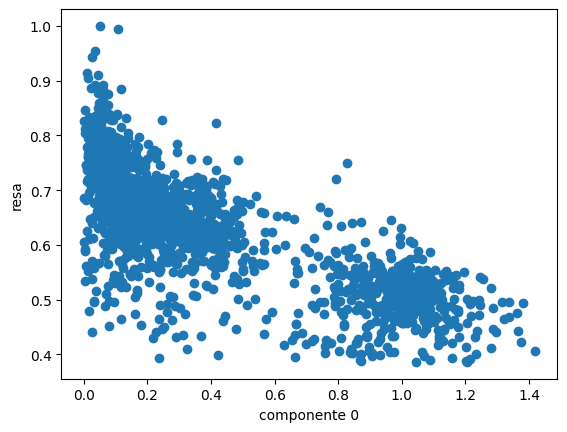

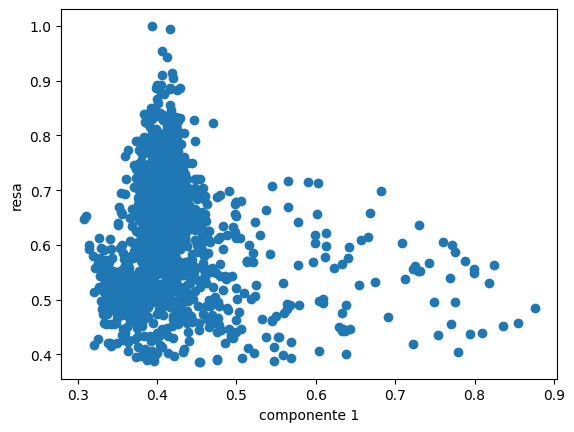

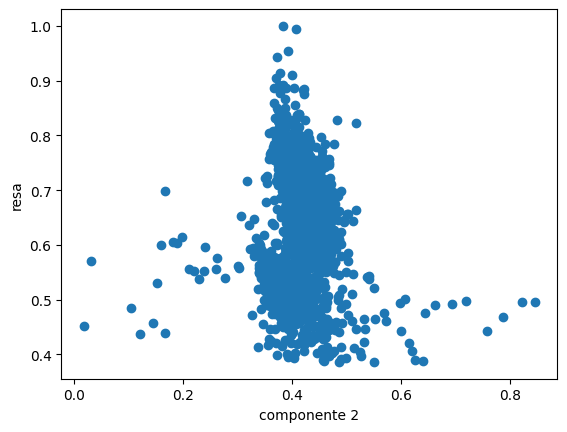

In [25]:
for a in range(num_components):
    
    fig, ax = plt.subplots()
    scatter = ax.scatter(score_array_6[:,a],(newResa6/newResa6.max()))
    plt.xlabel("componente " +str(a))
    plt.ylabel("resa")
